In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

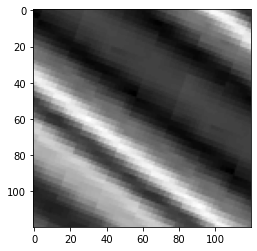

In [170]:
real_alpha = 51.6
img = cv2.imread('sti_imgs/fai=%s.png' % str(real_alpha))
# img = cv2.imread('sti/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

length = min(img.shape[0], img.shape[1])
length = length if length % 2 == 0 else length -1
img = img[0:length, 0:length]

plt.imshow(img, 'gray')
plt.show()

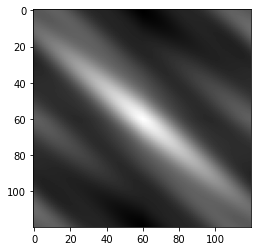

In [171]:
img_f = np.fft.fft2(img)
img_ac = np.fft.fftshift(np.fft.ifft2(np.abs(img_f) ** 2))
width, height = img_ac.shape
img_ac_show = abs(img_ac)
img_ac_show = img_ac_show / img_ac_show[width // 2][height // 2]

plt.imshow(img_ac_show, 'gray')

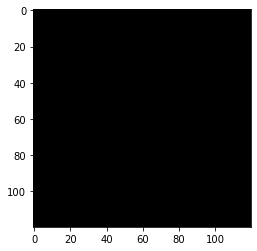

In [172]:
img_ac1 = cv2.filter2D(img, -1, img, anchor=(-1, -1))
plt.imshow(img_ac1, 'gray')

In [173]:
# center = (width / 2, height / 2)
# maxRadius = width / 2 * np.sqrt(2)
# img_ac_polar = cv2.linearPolar(img_ac_show, center, maxRadius,
#                                cv2.WARP_FILL_OUTLIERS + cv2.INTER_LINEAR)
# plt.imshow(img_ac_polar, 'gray')

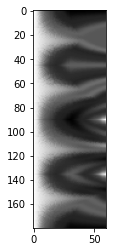

In [174]:
from LinearPolar import RecTangle2Polar
theta_num = 180
img_ac_polar = RecTangle2Polar(img_ac_show, [width//2, theta_num])
plt.imshow(img_ac_polar, 'gray')

In [175]:
mu = {}
for i in range(img_ac_polar.shape[0]):
    mu_temp = sum(img_ac_polar[i, :]) - (img_ac_polar[i, 0] + img_ac_polar[i, img_ac_polar.shape[1]-1]) / 2
    mu[i] = mu_temp

mu_ordered = sorted(mu.items(), key = lambda x:x[1], reverse=True)
fai = 90 - list(mu_ordered)[0][0] * 360 / theta_num % 90
print('real_fai=%.2f, cal_fai=%.2f' % (real_alpha, fai))

real_fai=51.60, cal_fai=50.00


In [176]:
NTI = mu_ordered[0][1] / mu_ordered[len(mu_ordered)-1][1]
print(NTI)

1.107099543408505
